<a href="https://colab.research.google.com/github/hayTambourineMan/CSCI-6170/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

## Task 1
1. Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).

2. Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).

3. Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

### Question 1

#### Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE).

Logistic regression is used to predict the probability of a binary outcome (e.g., $y \in \{0, 1\}$) based on input features $X$. It uses the sigmoid function to map linear combinations of input features and parameters $\theta$ into probabilities. The sigmoid function is:

$$
P(y = 1 \mid X; \theta) = \sigma(X\theta) = \frac{1}{1 + e^{-X\theta}}
$$

The likelihood function represents the probability of the observed data given the model parameters. For binary classification, the likelihood of each data point is:

$$
P(y_i \mid X_i; \theta) = \sigma(X_i\theta)^{y_i} \cdot (1 - \sigma(X_i\theta))^{1 - y_i}
$$

The likelihood of the entire dataset is the product of these individual probabilities:

$$
L(\theta) = \prod_{i=1}^{n} \left[ \sigma(X_i\theta)^{y_i} \cdot (1 - \sigma(X_i\theta))^{1 - y_i} \right]
$$

To simplify computation, the natural logarithm of the likelihood is taken, resulting in the log-likelihood function:

$$
\ell(\theta) = \sum_{i=1}^{n} \left[ y_i \log \sigma(X_i\theta) + (1 - y_i) \log (1 - \sigma(X_i\theta)) \right]
$$

The objective of Maximum Likelihood Estimation (MLE) is to maximize the log-likelihood. Equivalently, we minimize the negative log-likelihood, which becomes the cost function for logistic regression:

$$
J(\theta) = - \ell(\theta) = - \sum_{i=1}^{n} \left[ y_i \log \sigma(X_i\theta) + (1 - y_i) \log (1 - \sigma(X_i\theta)) \right]
$$

#### Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE.

The Maximum A Posteriori (MAP) technique builds on MLE by incorporating prior knowledge about the parameters $\theta$ using Bayes' theorem:

$$
P(\theta \mid X, y) = \frac{P(y \mid X, \theta) P(\theta)}{P(y \mid X)}
$$

MAP maximizes the posterior probability of the parameters given the data. The MAP objective function combines the log-likelihood and the log of the prior distribution:

$$
\ell_{\text{MAP}}(\theta) = \log P(y \mid X, \theta) + \log P(\theta)
$$

The key difference between MLE and MAP is that MLE assumes no prior knowledge of $\theta$, whereas MAP incorporates a prior distribution ($P(\theta)$). This makes MAP particularly useful when data is sparse or when domain knowledge about the parameters is available. For instance, if $P(\theta)$ is modeled as a Gaussian prior, it acts as a regularizer, penalizing large values of $\theta$. In contrast, MLE may overfit in scenarios with limited data because it does not regularize the parameter estimates.

MAP and MLE share similarities in that both rely on the likelihood function; however, MAP adds the additional term from the prior. This adjustment can lead to better generalization in practical applications where data is noisy or limited.

#### Citation
- https://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote06.html

### Question 2

#### Define a machine learning problem you wish to solve using Logistic Regression.

I want to predict whether an individual has heart disease based on various health-related metrics. These metrics can include body mass index (BMI), smoking status, physical activity levels, alcohol consumption, and other factors. This binary classification will predict a binary outcome: the presence (1) or absence (0) of heart disease.

#### Justify why logistic regression is the best choice and compare it briefly to another linear classification model.

Logistic regression is the best choice for this problem. First, it is designed for binary classification tasks, so it is suited for predicting the presence or absence of heart disease. Logistic regression uses the sigmoid function to map the linear combination of input features to probabilities, providing outputs between 0 and 1.

Additionally, logistic regression offers high interpretability, which is important in medical applications. The model coefficients indicate how each feature influences the likelihood of heart disease, making it easier for us to understand the predictions. Logistic regression is also computationally efficient.

Support Vector Machines (SVM) is another linear classification model that could be applied to this problem. However, SVM focuses on finding the hyperplane that maximizes the margin between data points of different classes. In contrast, logistic regression uses the sigmoid function and maximum likelihood estimation to find the decision boundary that best fits the data.

One advantage of logistic regression is its probabilistic output, which provides meaningful probabilities for predictions. Logistic regression is also easier to interpret since its coefficients directly indicate the effect of each feature on the probability of heart disease, while SVM's decision boundary and support vectors are less intuitive.

SVM is also computationally expensive, particularly for large datasets, making it less efficient than logistic regression in simpler, linearly separable problems.

#### Citation
- https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16

### Qustion 3

#### Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

In the Heart Disease Health Indicators Dataset, the target variable y is binary, representing heart disease presence (1) or absence (0). Predictor variables X, such as BMI, smoking status, and physical activity, correspond to features in the dataset. Each feature contributes independently and additively to the log-odds of the target variable, as assumed by logistic regression.

Key assumptions include the linearity of log-odds, independence of observations, and absence of perfect multicollinearity. For example, features like BMI and physical activity should not be overly correlated. Additionally, the model assumes that the dataset captures all relevant predictors without significant omissions. Meeting these assumptions ensures accurate and interpretable predictions of heart disease.

## Task 2
1. Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10 features to allow for more complex analysis.
2. Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.
3. Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

### Question 1

#### Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10 features to allow for more complex analysis.

The Heart Disease Health Indicators Dataset can be found on Kaggle: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset?resource=download

### Question 2

#### Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# load dataset
file_path = '/content/heart_disease_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.shape

(253680, 22)

In [ ]:
# check missing values
data.isnull().sum()
# no missing values, no need to perform any filling

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# The overall result shows most subjects (around 90%) don't have Heart Diseaseor Attack
data.HeartDiseaseorAttack.value_counts(normalize=True)

,proportion
HeartDiseaseorAttack,
0.0,0.905814
1.0,0.094186


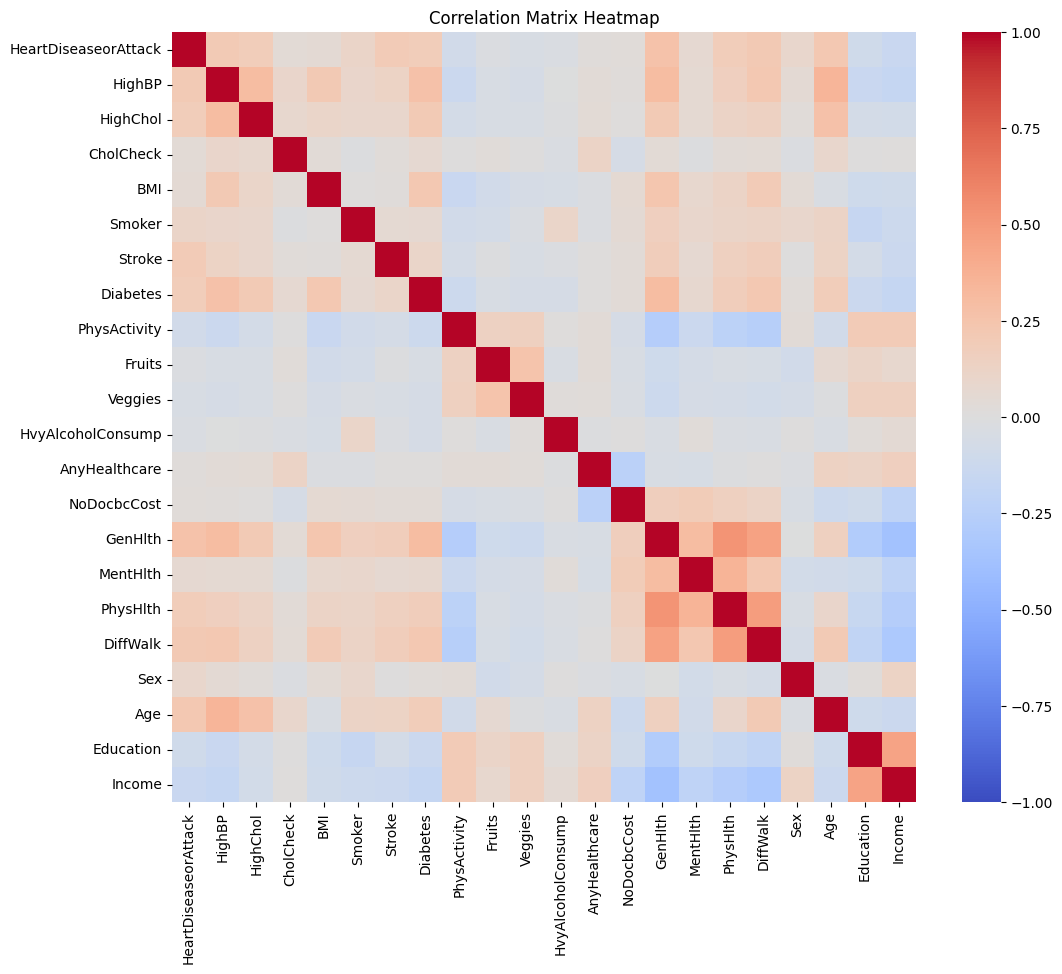

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# calculate VIF function
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# selecting features for VIF calculation
numeric_features = data.select_dtypes(include=[np.number])

# calculate VIF
print("\nVariance Inflation Factor (VIF):")
vif = calculate_vif(numeric_features)
print(vif)


Variance Inflation Factor (VIF):
                 Feature        VIF
0   HeartDiseaseorAttack   1.294668
1                 HighBP   2.330433
2               HighChol   2.046716
3              CholCheck  23.189394
4                    BMI  18.380432
5                 Smoker   1.933827
6                 Stroke   1.127271
7               Diabetes   1.415910
8           PhysActivity   4.647628
9                 Fruits   3.032937
10               Veggies   5.827979
11     HvyAlcoholConsump   1.085249
12         AnyHealthcare  20.845881
13           NoDocbcCost   1.216230
14               GenHlth  10.852107
15              MentHlth   1.463480
16              PhysHlth   1.999613
17              DiffWalk   1.842591
18                   Sex   1.911396
19                   Age   9.905251
20             Education  29.593754
21                Income  14.187901


In [ ]:
# Handling multicollinearity

# Remove features with high VIF (I dropped features with VIF > 10)
high_vif_features = vif[vif['VIF'] > 10]["Feature"].tolist()
print(f"\nFeatures with high VIF (>10): {high_vif_features}")

# Dropping high VIF features
reduced_data = numeric_features.drop(columns=high_vif_features)

# Recalculate VIF for the reduced dataset
print("\nVIF after removing high VIF features:")
reduced_vif = calculate_vif(reduced_data)
print(reduced_vif)


Features with high VIF (>10): ['CholCheck', 'BMI', 'AnyHealthcare', 'GenHlth', 'Education', 'Income']

VIF after removing high VIF features:
                 Feature       VIF
0   HeartDiseaseorAttack  1.272642
1                 HighBP  2.246782
2               HighChol  2.033406
3                 Smoker  1.896677
4                 Stroke  1.121885
5               Diabetes  1.363773
6           PhysActivity  3.845146
7                 Fruits  2.961899
8                Veggies  4.867657
9      HvyAlcoholConsump  1.078518
10           NoDocbcCost  1.145381
11              MentHlth  1.395359
12              PhysHlth  1.790658
13              DiffWalk  1.744444
14                   Sex  1.750006
15                   Age  6.881412


### Question 3

#### Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

I'll be using the dataset without highly correlated variables (VIF < 10), generated from the previous question from this point forward.

In [ ]:
# library
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

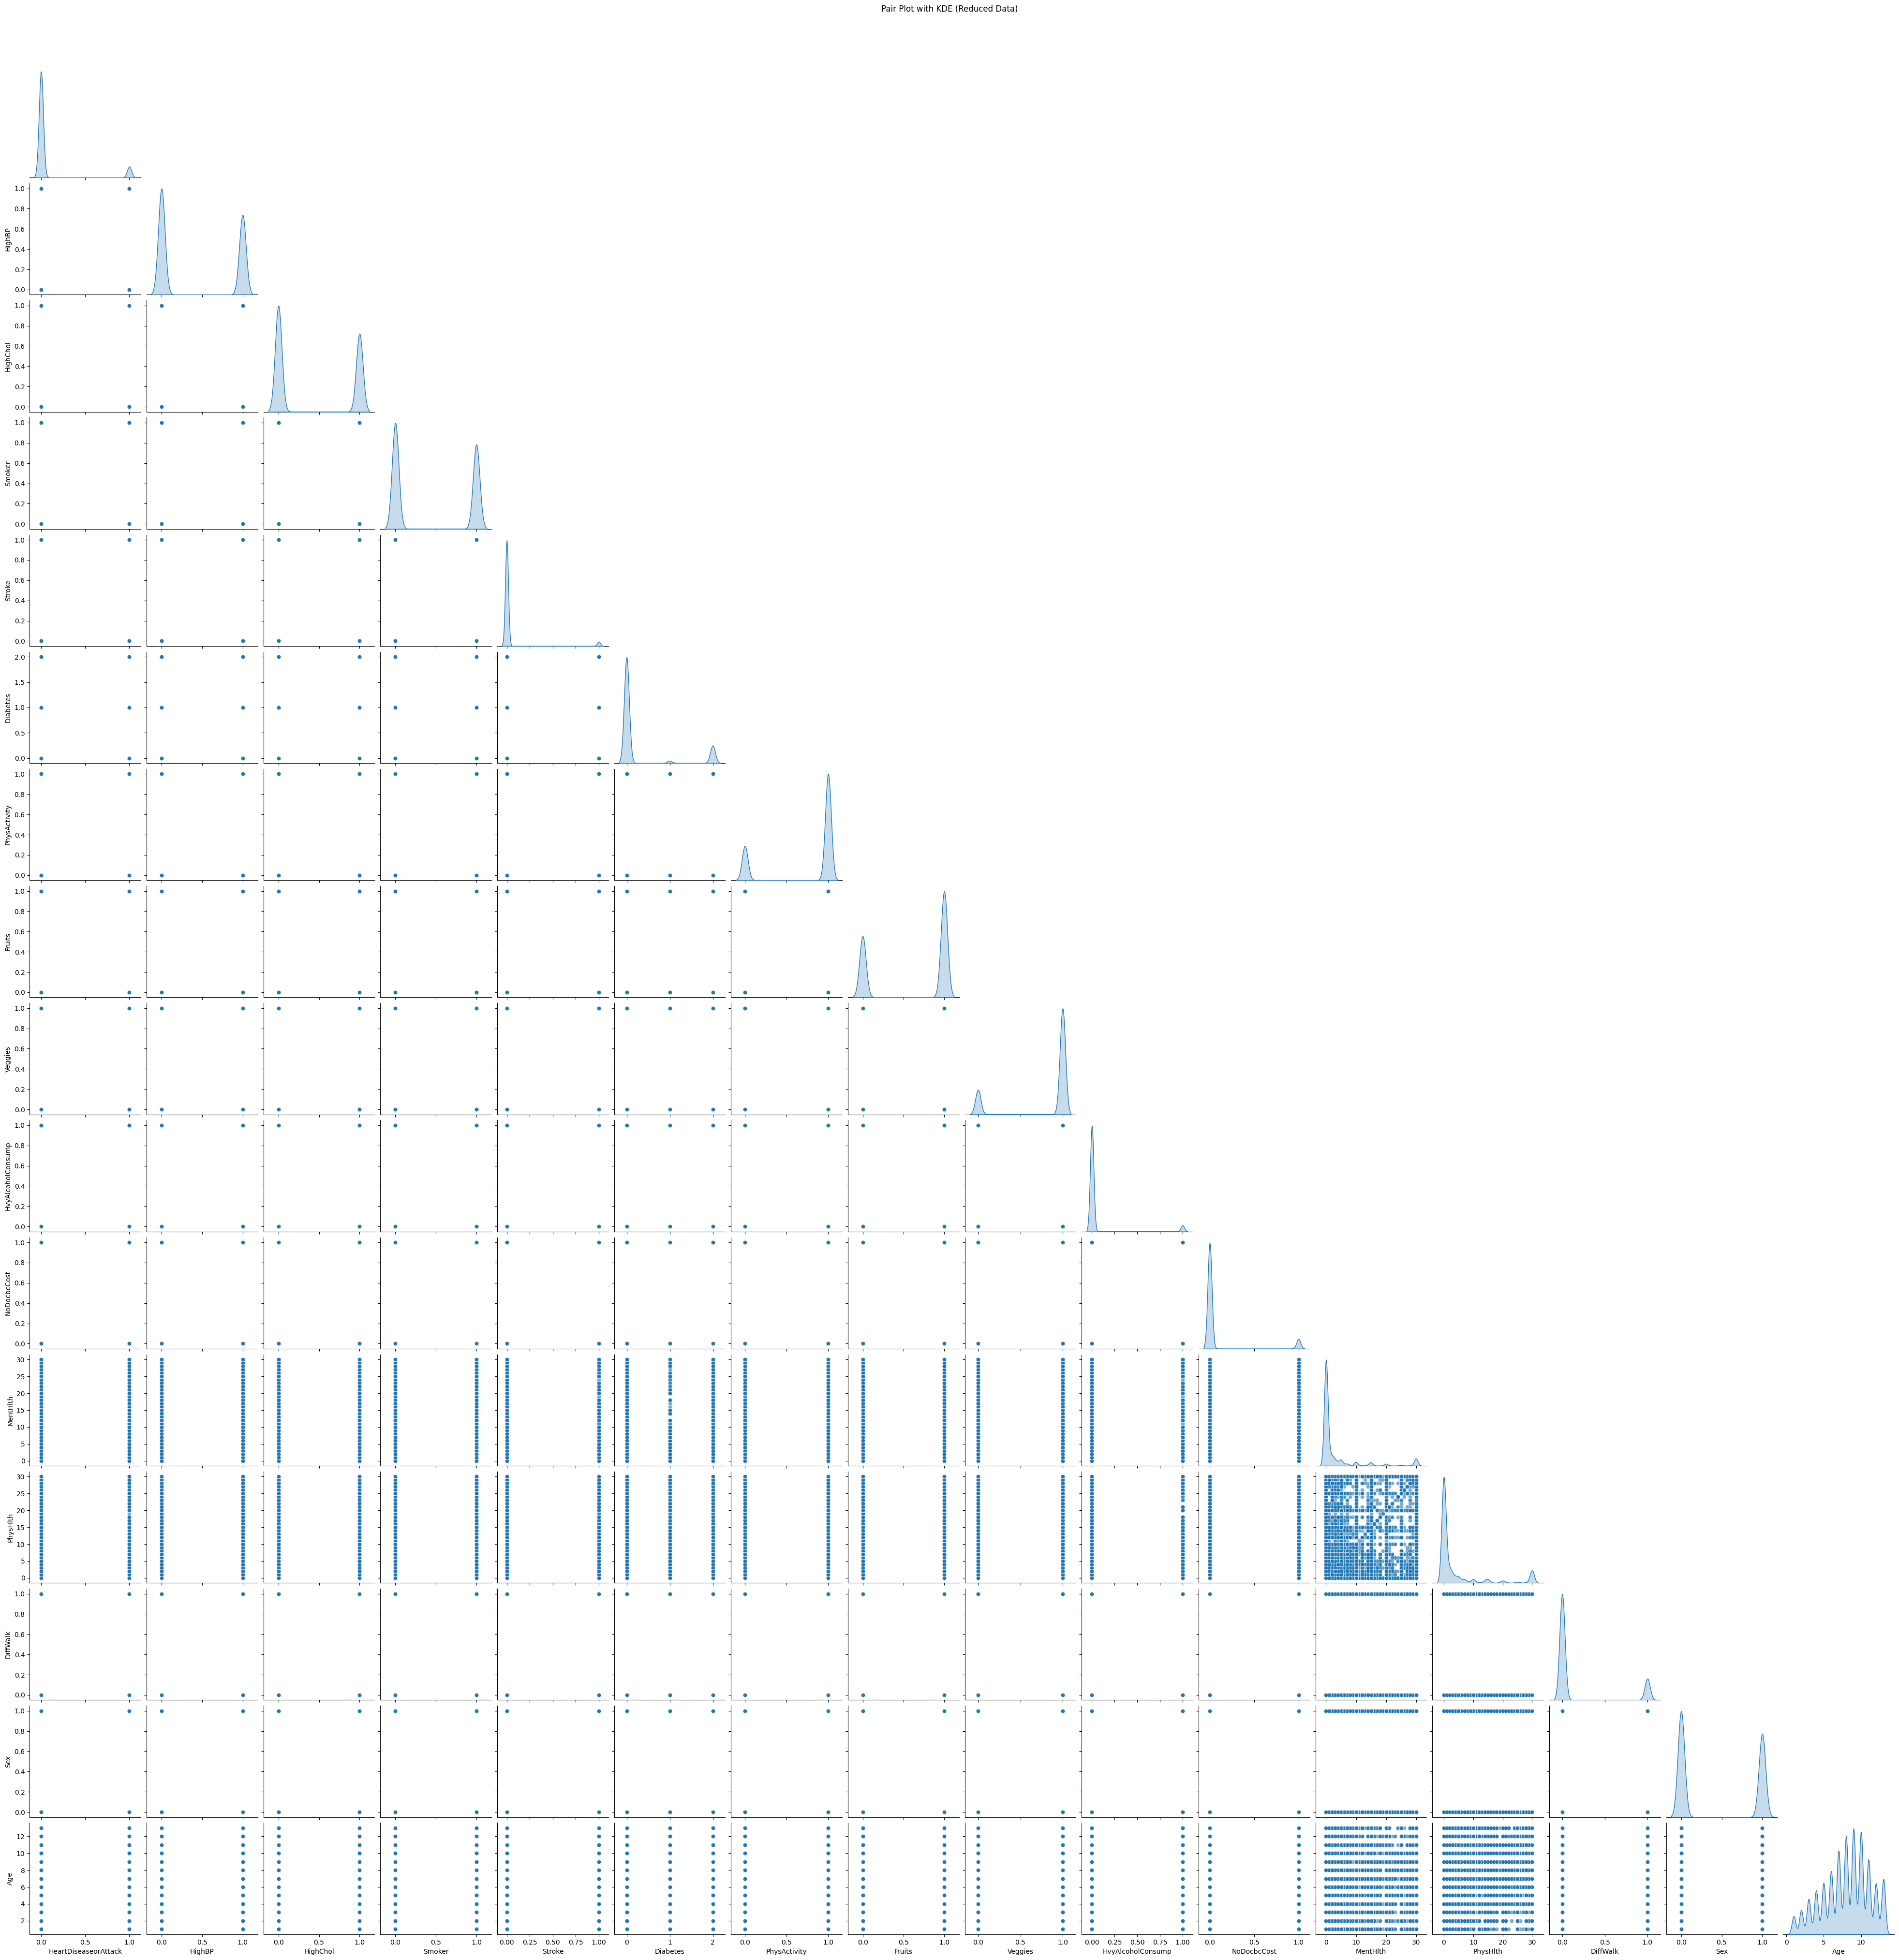

In [ ]:
# Pair plot with KDE
sns.pairplot(reduced_data, diag_kind="kde", plot_kws={'alpha': 0.6}, corner=True)
plt.suptitle("Pair Plot with KDE (Reduced Data)", y=1.02)
plt.show()

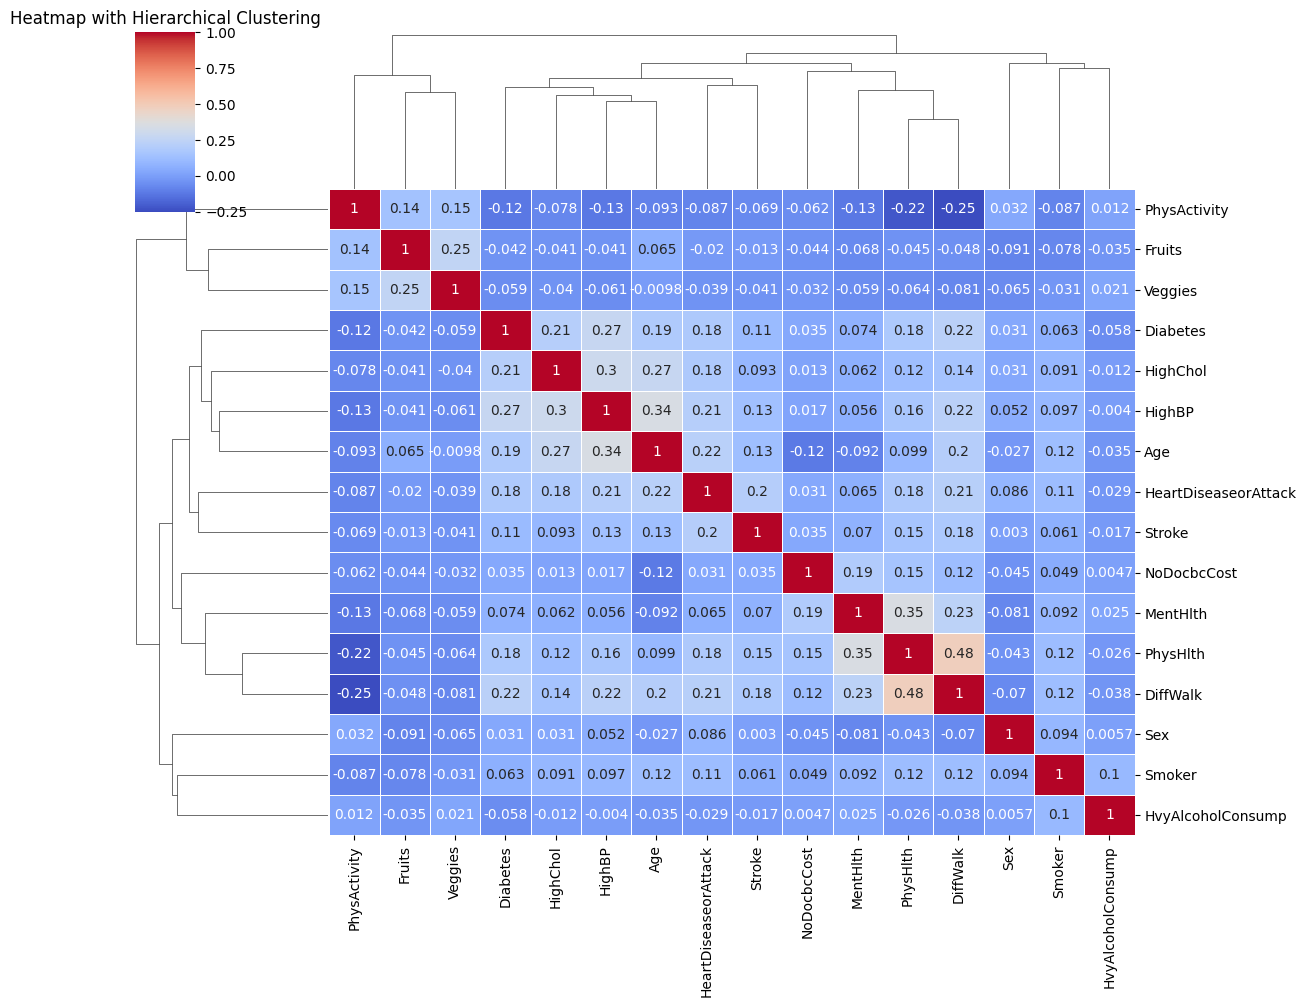

In [ ]:
# Heatmap with hierarchical clustering

# Compute the linkage matrix for clustering
linkage_matrix = linkage(reduced_data.T, method='ward')
# Create a heatmap with hierarchical clustering
sns.clustermap(
    reduced_data.corr(),
    cmap="coolwarm",
    annot=True,
    linewidths=0.5,
    figsize=(12, 10),
    row_cluster=True,
    col_cluster=True
)
plt.title("Heatmap with Hierarchical Clustering")
plt.show()

The pair plot with KDE shows the relationships between the features. Diagonal plots show the distribution of individual features using kernel density estimation (KDE), while scatterplots depict pairwise relationships. The absence of clear clustering or strong linear trends in most scatterplots suggests weak direct associations between some features, this means that I handle multicollinearity successfully by removing high-VIF features.

The heatmap with hierarchical clustering further confirms this. The color gradient indicates correlation strength, with most values clustered around weak correlations (close to 0), reflecting minimal multicollinearity. The dendrogram clusters features with similar patterns, helping to identify groups with overlapping information.

## Task 3
1. Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.
2. Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Compute gradients and cost
def evaluate_gradient(X, Y, w, b):
    m = len(X)
    A = sigmoid(np.dot(X, w) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    dw = (1/m) * np.dot(X.T, (A - Y))
    db = (1/m) * np.sum(A - Y)
    return dw, db, cost

# Logistic regression with gradient descent variants
def logistic_regression(X, Y, learning_rate=0.01, iterations=1000, gradient_descent=0, batch_size=256, debug=0):
    # Initialize parameters
    w = np.zeros((X.shape[1], 1))
    b = 0
    cost_history = []

    for i in range(iterations):
        if gradient_descent == 0:  # Batch Gradient Descent
            dw, db, cost = evaluate_gradient(X, Y, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
            cost_history.append(cost)
        elif gradient_descent == 1:  # Mini-Batch Gradient Descent
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            Y_shuffled = Y[indices]
            for j in range(0, len(X), batch_size):
                X_batch = X_shuffled[j:j + batch_size]
                Y_batch = Y_shuffled[j:j + batch_size]
                dw, db, cost = evaluate_gradient(X_batch, Y_batch, w, b)
                w -= learning_rate * dw
                b -= learning_rate * db
            cost_history.append(cost)
        elif gradient_descent == 2:  # Stochastic Gradient Descent
            rand_index = np.random.randint(len(X))
            X_sample = X[rand_index, :].reshape(1, -1)
            Y_sample = Y[rand_index].reshape(1, 1)
            dw, db, cost = evaluate_gradient(X_sample, Y_sample, w, b)
            w -= learning_rate * dw
            b -= learning_rate * db
            cost_history.append(cost)

        if debug and i % (iterations // 10) == 0:
            print(f"Iteration {i}, Cost: {cost}")

    if debug:
        plt.plot(cost_history)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Cost Reduction Over Iterations")
        plt.show()

    return w, b

# Predict function
def predict(X, w, b):
    A = sigmoid(np.dot(X, w) + b)
    return np.where(A > 0.5, 1, 0)

# Evaluate the performance
def get_score(y_test, y_pred):
    accuracy = np.mean(y_test == y_pred)
    print(f"Accuracy: {accuracy}")

For preprocessing, I normalizes the reduced dataset features and adds a bias term, and splits the data into training (80%) and testing (20%) sets.

In [ ]:
# libraries
from sklearn.model_selection import train_test_split

# Preprocessing
target = "HeartDiseaseorAttack"
X = reduced_data.drop(columns=[target])  # Features
y = reduced_data[target].values.reshape(-1, 1)  # Target

# Normalize features
X = (X - X.mean()) / X.std()

# Add bias
def add_bias(X):
    m = X.shape[0]
    bias = np.ones((m, 1))
    return np.hstack((bias, X))

X = add_bias(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

Iteration 0, Cost: 0.6931471805599452
Iteration 500, Cost: 0.2899029920322883
Iteration 1000, Cost: 0.26158604085893444
Iteration 1500, Cost: 0.25362704924424956
Iteration 2000, Cost: 0.25017444385537246
Iteration 2500, Cost: 0.2483491746731361
Iteration 3000, Cost: 0.2472743606510945
Iteration 3500, Cost: 0.24659793360699878
Iteration 4000, Cost: 0.24615273834103227
Iteration 4500, Cost: 0.24585022046207858


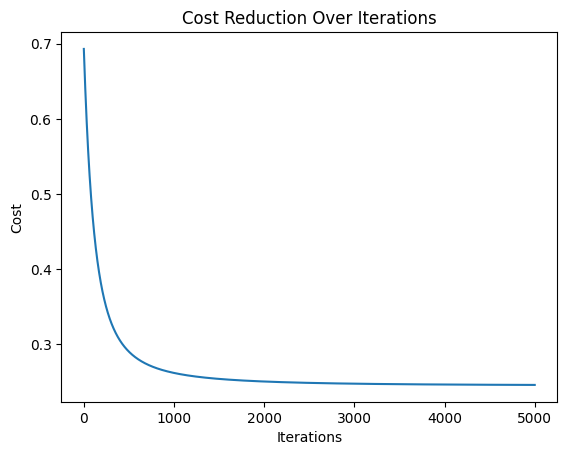

In [ ]:
# Batch Gradient Descent
w_batch, b_batch = logistic_regression(X_train, y_train, learning_rate=0.01, iterations=5000, gradient_descent=0, debug=1)

Iteration 0, Cost: 0.2756627894470385
Iteration 500, Cost: 0.2071434476060645
Iteration 1000, Cost: 0.22339923286237684
Iteration 1500, Cost: 0.22585810887611016
Iteration 2000, Cost: 0.21009614557920825
Iteration 2500, Cost: 0.26787068370200373
Iteration 3000, Cost: 0.2715317287422695
Iteration 3500, Cost: 0.22704964366382074
Iteration 4000, Cost: 0.21402927822509335
Iteration 4500, Cost: 0.20777215742924784


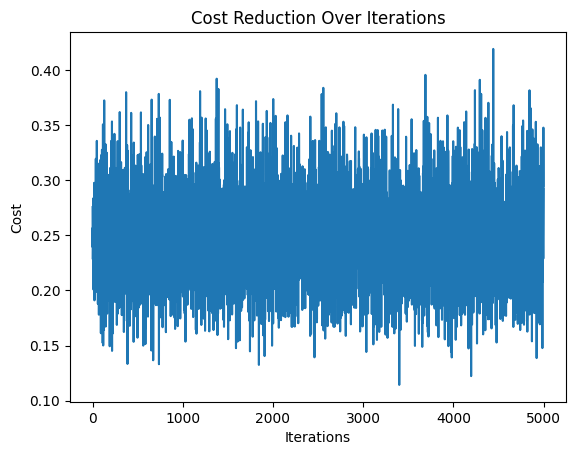

In [ ]:
# Mini-Batch Gradient Descent
w_mini, b_mini = logistic_regression(X_train, y_train, learning_rate=0.01, iterations=5000, gradient_descent=1, batch_size=256, debug=1)

Iteration 0, Cost: 0.16649659723967647
Iteration 250, Cost: 0.1753470986522359
Iteration 500, Cost: 0.23653280783268166
Iteration 750, Cost: 0.295851208033435
Iteration 1000, Cost: 0.1979949792754338
Iteration 1250, Cost: 0.25647213490987686
Iteration 1500, Cost: 0.2727791134529072
Iteration 1750, Cost: 0.35504909078484465
Iteration 2000, Cost: 0.31342211182763957
Iteration 2250, Cost: 0.32887702208382696


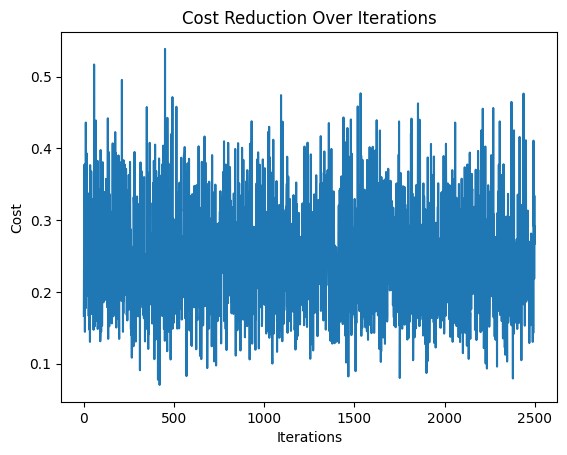

In [ ]:
# Mini-Batch Gradient Descent (smaller batch size and iterations)
w_mini, b_mini = logistic_regression(X_train, y_train, learning_rate=0.01, iterations=2500, gradient_descent=1, batch_size=64, debug=1)

Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.0791996041741865
Iteration 1000, Cost: 0.18594979570569645
Iteration 1500, Cost: 0.02950055309355235
Iteration 2000, Cost: 0.0668281972483248
Iteration 2500, Cost: 0.06777448446542053
Iteration 3000, Cost: 0.06268164680159928
Iteration 3500, Cost: 0.003956199621073272
Iteration 4000, Cost: 0.01865951866436547
Iteration 4500, Cost: 0.01751584053983795


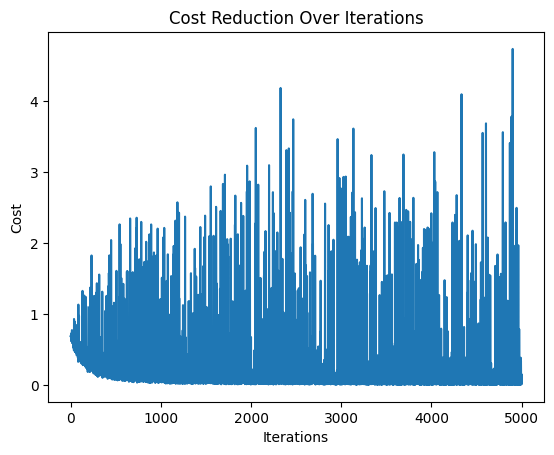

In [ ]:
# Stochastic Gradient Descent
w_sgd, b_sgd = logistic_regression(X_train, y_train, learning_rate=0.01, iterations=5000, gradient_descent=2, debug=1)

Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.5070760103514873
Iteration 1000, Cost: 0.3498837208960191
Iteration 1500, Cost: 0.3353005634550531
Iteration 2000, Cost: 0.9631316917985576
Iteration 2500, Cost: 0.40527265603345636
Iteration 3000, Cost: 0.18084876215254025
Iteration 3500, Cost: 0.44636799072734595
Iteration 4000, Cost: 0.2317166662770981
Iteration 4500, Cost: 0.2233252819693495


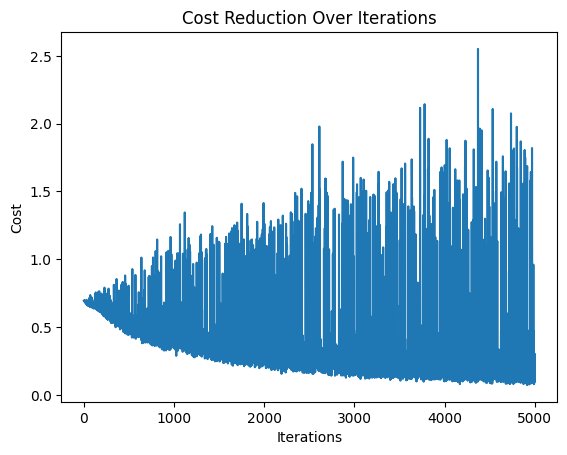

In [ ]:
# Stochastic Gradient Descent (smaller step size)
w_sgd, b_sgd = logistic_regression(X_train, y_train, learning_rate=0.001, iterations=5000, gradient_descent=2, debug=1)

In [ ]:
# Test Predictions
y_pred_batch = predict(X_test, w_batch, b_batch)
y_pred_mini = predict(X_test, w_mini, b_mini)
y_pred_sgd = predict(X_test, w_sgd, b_sgd)

# Evaluate Scores
print("\nBatch Gradient Descent Results:")
get_score(y_test, y_pred_batch)

print("\nMini-Batch Gradient Descent Results:")
get_score(y_test, y_pred_mini)

print("\nStochastic Gradient Descent Results:")
get_score(y_test, y_pred_sgd)


Batch Gradient Descent Results:
Accuracy: 0.9080731630400505

Mini-Batch Gradient Descent Results:
Accuracy: 0.9079351939451277

Stochastic Gradient Descent Results:
Accuracy: 0.9075212866603595


Batch Gradient Descent (BGD) reduced the cost steadily when training. Since it uses the entire dataset to calculate gradients in every iteration, the updates were smooth, and the cost function decreased without any noticeable fluctuations. This approach achieved the highest test accuracy of 90.87%, showing that it generalized well to the test data. However, BGD requires processing all training data at once, which can make it slower and more resource-intensive, especially with larger datasets.

Mini-Batch Gradient Descent (MBGD) worked by splitting the dataset into smaller batches, which sped up the training process. Larger batch sizes resulted in smoother training, while smaller batch sizes caused more fluctuation in the cost. For example, with a batch size of 256, the cost fluctuated but remained relatively stable, while with a batch size of 64, the fluctuations were more noticeable. Despite the noise, MBGD converged effectively and achieved a test accuracy of 90.80%.

Stochastic Gradient Descent (SGD) updated the model using one data point at a time, which introduced the most noise into the training process. The cost function fluctuated heavily due to this variability, making the path to convergence less stable. The learning rate also had a significant impact on SGD's behavior. A higher learning rate made the fluctuations more dramatic, while a lower learning rate smoothed them out but slowed down convergence. Despite the instability, SGD achieved a test accuracy of 90.75%. This shows its ability to perform well despite its noisy updates. Overall, all three methods produced similar results, but their training behaviors showed clear differences based on how they handle data during updates.









## Task4
1. Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.
2. Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze and interpret results for each algorithm.
3. Perform a hyperparameter tuning process (manual or automated using grid search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your sources.
4. Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.

### Question 1

In [ ]:
# optimization algorithms
def logistic_regression_optimized(X, Y, learning_rate=0.01, iterations=1000, optimizer="vanilla", beta1=0.9, beta2=0.999, epsilon=1e-8, debug=0):
    w = np.zeros((X.shape[1], 1))
    b = 0
    cost_history = []

    v_dw, v_db = 0, 0  # Momentum
    s_dw, s_db = 0, 0  # RMSProp
    t = 0  # Adam

    for i in range(iterations):
        # randomly select a sample for stochastic gradient descent
        rand_index = np.random.randint(len(X))
        X_sample = X[rand_index, :].reshape(1, -1)
        Y_sample = Y[rand_index].reshape(1, 1)

        # gradients and cost
        dw, db, cost = evaluate_gradient(X_sample, Y_sample, w, b)

        if optimizer == "momentum":
            v_dw = beta1 * v_dw + (1 - beta1) * dw
            v_db = beta1 * v_db + (1 - beta1) * db
            w -= learning_rate * v_dw
            b -= learning_rate * v_db

        elif optimizer == "rmsprop":
            s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
            s_db = beta2 * s_db + (1 - beta2) * (db ** 2)
            w -= learning_rate * dw / (np.sqrt(s_dw) + epsilon)
            b -= learning_rate * db / (np.sqrt(s_db) + epsilon)

        elif optimizer == "adam":
            t += 1
            v_dw = beta1 * v_dw + (1 - beta1) * dw
            v_db = beta1 * v_db + (1 - beta1) * db
            s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
            s_db = beta2 * s_db + (1 - beta2) * (db ** 2)

            # bias-corrected moments
            v_dw_corr = v_dw / (1 - beta1 ** t)
            v_db_corr = v_db / (1 - beta1 ** t)
            s_dw_corr = s_dw / (1 - beta2 ** t)
            s_db_corr = s_db / (1 - beta2 ** t)

            w -= learning_rate * v_dw_corr / (np.sqrt(s_dw_corr) + epsilon)
            b -= learning_rate * v_db_corr / (np.sqrt(s_db_corr) + epsilon)

        else:
            # SGD update
            w -= learning_rate * dw
            b -= learning_rate * db

        cost_history.append(cost)

        if debug and i % (iterations // 10) == 0:
            print(f"Iteration {i}, Cost: {cost}")

    if debug:
        plt.plot(cost_history)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title(f"Cost Reduction with {optimizer.capitalize()}")
        plt.show()

    return w, b

Vanilla SGD
Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.5014836687773697
Iteration 1000, Cost: 0.4184399326304647
Iteration 1500, Cost: 0.8732829764100796
Iteration 2000, Cost: 0.5682397445225146
Iteration 2500, Cost: 0.4722589937841757
Iteration 3000, Cost: 0.29088595228464914
Iteration 3500, Cost: 0.1301870085331628
Iteration 4000, Cost: 0.1393101811855328
Iteration 4500, Cost: 0.15299783242379034


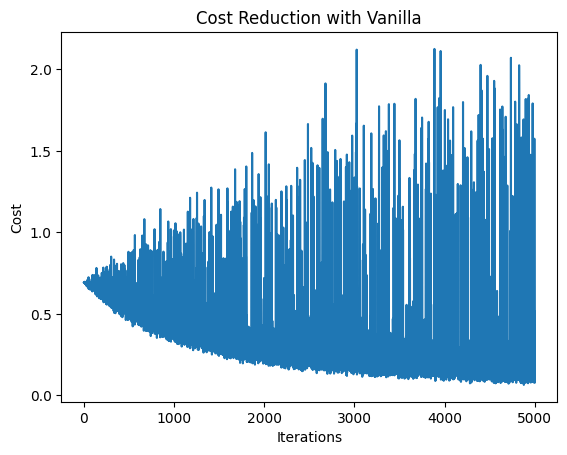


SGD with Momentum
Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.47005774744967616
Iteration 1000, Cost: 1.030273585923129
Iteration 1500, Cost: 1.2205455152913525
Iteration 2000, Cost: 0.40177432147496184
Iteration 2500, Cost: 0.3133328078642367
Iteration 3000, Cost: 1.5003983431916674
Iteration 3500, Cost: 0.17559608414256608
Iteration 4000, Cost: 0.21294695755598775
Iteration 4500, Cost: 0.21387914623063436


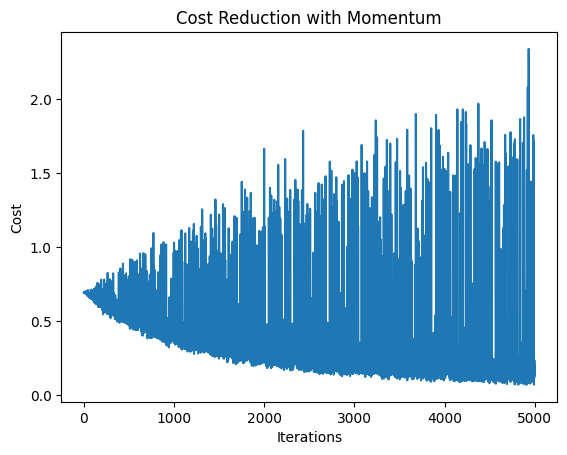


SGD with RMSProp
Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.3385768476968453
Iteration 1000, Cost: 0.07243260841034854
Iteration 1500, Cost: 0.09827791066712745
Iteration 2000, Cost: 0.14779449233788824
Iteration 2500, Cost: 0.18511269464910704
Iteration 3000, Cost: 0.02483671309669056
Iteration 3500, Cost: 2.552276247050269
Iteration 4000, Cost: 0.1001907644692428
Iteration 4500, Cost: 0.020939284794259518


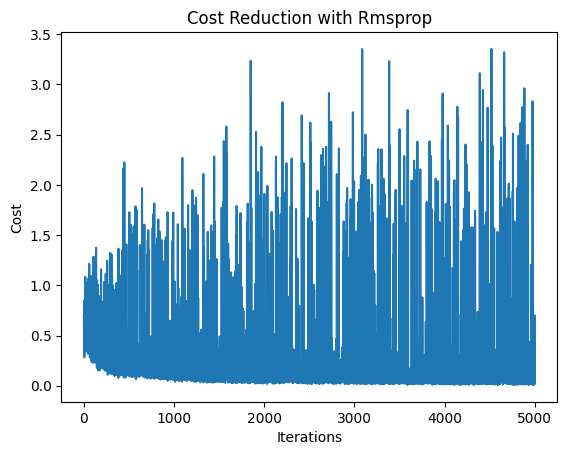


SGD with Adam
Iteration 0, Cost: 0.6931471805599453
Iteration 500, Cost: 0.5808286814603678
Iteration 1000, Cost: 0.29846195698695327
Iteration 1500, Cost: 0.1600646763762137
Iteration 2000, Cost: 0.08480591250615681
Iteration 2500, Cost: 0.11078799351907488
Iteration 3000, Cost: 0.1666026057269245
Iteration 3500, Cost: 0.2574698639114715
Iteration 4000, Cost: 0.03401206939042792
Iteration 4500, Cost: 0.21309936195411958


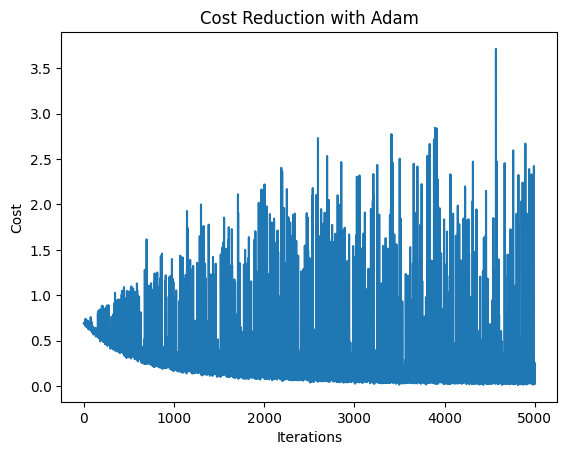

In [ ]:
# Testing optimization algorithms
print("Vanilla SGD")
w_vanilla, b_vanilla = logistic_regression_optimized(X_train, y_train, learning_rate=0.001, iterations=5000, optimizer="vanilla", debug=1)

print("\nSGD with Momentum")
w_momentum, b_momentum = logistic_regression_optimized(X_train, y_train, learning_rate=0.001, iterations=5000, optimizer="momentum", beta1=0.9, debug=1)

print("\nSGD with RMSProp")
w_rmsprop, b_rmsprop = logistic_regression_optimized(X_train, y_train, learning_rate=0.001, iterations=5000, optimizer="rmsprop", beta2=0.999, debug=1)

print("\nSGD with Adam")
w_adam, b_adam = logistic_regression_optimized(X_train, y_train, learning_rate=0.001, iterations=5000, optimizer="adam", beta1=0.9, beta2=0.999, debug=1)

In [ ]:
# Prediction and results
print("\nVanilla SGD Results:")
y_pred_vanilla = predict(X_test, w_vanilla, b_vanilla)
get_score(y_test, y_pred_vanilla)

print("\nMomentum Results:")
y_pred_momentum = predict(X_test, w_momentum, b_momentum)
get_score(y_test, y_pred_momentum)

print("\nRMSProp Results:")
y_pred_rmsprop = predict(X_test, w_rmsprop, b_rmsprop)
get_score(y_test, y_pred_rmsprop)

print("\nAdam Results:")
y_pred_adam = predict(X_test, w_adam, b_adam)
get_score(y_test, y_pred_adam)


Vanilla SGD Results:
Accuracy: 0.9076789656259855

Momentum Results:
Accuracy: 0.9072847682119205

RMSProp Results:
Accuracy: 0.9083885209713024

Adam Results:
Accuracy: 0.9078760643330179


All method achieve similar accuracy.

Momentum incorporated past gradients to accelerate updates and reduce oscillations, which led to faster initial cost reductions compared to Vanilla SGD. The cost curve still exhibited fluctuations, reflecting the stochastic nature of updates, though it was somewhat smoother than that of vanilla SGD. Overshooting due to accumulated momentum may explain its slight underperformance.

RMSProp scaled the learning rate for each parameter using the running average of squared gradients, leading to smoother updates and more controlled cost reductions. Despite reducing the cost more effectively during training, RMSProp did not significantly improve accuracy. The lack of momentum in RMSProp might explain why it did not outperform SGD in terms of generalization.

Adam, combining the benefits of Momentum and RMSProp, achieved the most stable and fastest cost reduction among the methods. However, its test accuracy was again very close to Vanilla SGD. Adam's adaptive learning rates and bias corrections generally make it highly effective for noisy or sparse gradients, but this dataset's relatively uniform gradient structure might have limited its potential advantage over SGD.

An unexpected result was the similar test accuracies across all methods, including Vanilla SGD. This suggests that the dataset's gradients were well-behaved, and the lack of noise reduced the need for advanced optimizers. The noisy cost curves across all methods, despite using optimizers, indicate that the stochastic updates inherent to single-point sampling contributed significantly to the observed variability.

### Question 2

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# show multiple metrics
def evaluate_metrics(y_test, y_pred, algorithm_name="Algorithm"):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Results for {algorithm_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")
    print("-" * 40)

# Run predictions for each optimization algorithm
print("Vanilla SGD")
y_pred_vanilla = predict(X_test, w_vanilla, b_vanilla)
evaluate_metrics(y_test, y_pred_vanilla, "Vanilla SGD")

print("Momentum")
y_pred_momentum = predict(X_test, w_momentum, b_momentum)
evaluate_metrics(y_test, y_pred_momentum, "Momentum")

print("RMSProp")
y_pred_rmsprop = predict(X_test, w_rmsprop, b_rmsprop)
evaluate_metrics(y_test, y_pred_rmsprop, "RMSProp")

print("Adam")
y_pred_adam = predict(X_test, w_adam, b_adam)
evaluate_metrics(y_test, y_pred_adam, "Adam")


Vanilla SGD
Results for Vanilla SGD:
  Accuracy:  0.9077
  Precision: 0.6088
  Recall:    0.0493
  F1 Score:  0.0912
----------------------------------------
Momentum
Results for Momentum:
  Accuracy:  0.9073
  Precision: 0.6524
  Recall:    0.0287
  F1 Score:  0.0550
----------------------------------------
RMSProp
Results for RMSProp:
  Accuracy:  0.9084
  Precision: 0.6245
  Recall:    0.0631
  F1 Score:  0.1147
----------------------------------------
Adam
Results for Adam:
  Accuracy:  0.9079
  Precision: 0.5979
  Recall:    0.0602
  F1 Score:  0.1094
----------------------------------------


The results indicate that all optimization algorithms—Vanilla SGD, Momentum, RMSProp, and Adam—achieved similar accuracy, with values around 90% to 91%. However, there are noticeable differences in precision, recall, and F1 score. Momentum had the highest precision at 65.24%, indicating better performance in correctly identifying positive predictions. However, its recall was extremely low (2.87%), suggesting that it missed a large portion of actual positive cases. Similar trends were observed for the rest of the methods, with high precision but recall remaining very low across all algorithms. Consequently, the F1 scores, which balance precision and recall, were also low, with RMSProp achieving the highest F1 score of 11.47%. These results suggest that while the models performed well overall in accuracy, their ability to identify true positives (recall) was limited, potentially due to class imbalance or the thresholds used for classification. Adjusting the decision threshold or using techniques like oversampling or undersampling could help improve recall and F1 scores.

### Question 3

In [ ]:
# function for hyperparameter tuning
def tune_hyperparameters(X_train, y_train, X_test, y_test, algorithm="vanilla", param_grid=None, iterations=1000):
    best_params = None
    best_score = 0
    results = []

    # grid of parameters
    if param_grid is None:
        param_grid = {
            "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1],
            "beta1": [0.8, 0.9, 0.99],       # for Momentum/Adam
            "beta2": [0.9, 0.99, 0.999],    # for RMSProp/Adam
        }
    grid = ParameterGrid(param_grid)

    for params in grid:
        print(f"Testing params: {params}")
        learning_rate = params.get("learning_rate", 0.01)
        beta1 = params.get("beta1", 0.9) if algorithm in ["momentum", "adam"] else None
        beta2 = params.get("beta2", 0.999) if algorithm in ["rmsprop", "adam"] else None

        # train the model using the selected algorithm
        if algorithm in ["momentum", "rmsprop", "adam"]:
            w, b = logistic_regression_optimized(
                X_train, y_train,
                learning_rate=learning_rate,
                iterations=iterations,
                optimizer=algorithm,
                beta1=beta1,
                beta2=beta2,
                debug=0
            )
        else: # Vanilla SGD
            w, b = logistic_regression_optimized(
                X_train, y_train,
                learning_rate=learning_rate,
                iterations=iterations,
                optimizer=algorithm,
                debug=0
            )

        # evaluate on test set
        y_pred = predict(X_test, w, b)
        accuracy = accuracy_score(y_test, y_pred)
        results.append({"params": params, "accuracy": accuracy})

        # best parameters
        if accuracy > best_score:
            best_score = accuracy
            best_params = params

    print(f"\nBest params for {algorithm}: {best_params} with accuracy: {best_score:.4f}")
    return best_params, results

In [ ]:
# Perform hyperparameter tuning for each optimizer
print("Vanilla SGD")
best_params_vanilla, results_vanilla = tune_hyperparameters(X_train, y_train, X_test, y_test, algorithm="vanilla", param_grid={"learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1]})

print("Momentum")
best_params_momentum, results_momentum = tune_hyperparameters(X_train, y_train, X_test, y_test, algorithm="momentum", param_grid=param_grid)

print("\nRMSProp")
best_params_rmsprop, results_rmsprop = tune_hyperparameters(X_train, y_train, X_test, y_test, algorithm="rmsprop", param_grid=param_grid)

print("\nAdam")
best_params_adam, results_adam = tune_hyperparameters(X_train, y_train, X_test, y_test, algorithm="adam", param_grid=param_grid)

Vanilla SGD
Testing params: {'learning_rate': 0.001}
Testing params: {'learning_rate': 0.005}
Testing params: {'learning_rate': 0.01}
Testing params: {'learning_rate': 0.05}
Testing params: {'learning_rate': 0.1}

Best params for vanilla: {'learning_rate': 0.01} with accuracy: 0.9085
Momentum
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.001}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.005}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.01}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.05}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.1}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.001}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.005}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.01}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.05}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.1}
Testing params: {'b

<ipython-input-74-7f3389d10991>:12: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
<ipython-input-74-7f3389d10991>:12: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))


Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.005}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.01}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.05}
Testing params: {'beta1': 0.8, 'beta2': 0.9, 'learning_rate': 0.1}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.001}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.005}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.01}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.05}
Testing params: {'beta1': 0.8, 'beta2': 0.99, 'learning_rate': 0.1}
Testing params: {'beta1': 0.8, 'beta2': 0.999, 'learning_rate': 0.001}
Testing params: {'beta1': 0.8, 'beta2': 0.999, 'learning_rate': 0.005}
Testing params: {'beta1': 0.8, 'beta2': 0.999, 'learning_rate': 0.01}
Testing params: {'beta1': 0.8, 'beta2': 0.999, 'learning_rate': 0.05}
Testing params: {'beta1': 0.8, 'beta2': 0.999, 'learning_rate': 0.1}
Testing params: {'beta1': 0.9, 

Tuning improved performance slightly, but the limited accuracy gains indicate that the dataset and model complexity might have capped the potential improvements from fine-tuning.

### Question 4

Vanilla SGD, while computationally simple and easy to implement, showed less stability in cost reduction and required careful tuning of the learning rate. Its interpretability lies in its direct gradient descent approach, but it struggles with noisy gradients and is less efficient for large-scale datasets where we need adaptive techniques.

Momentum introduced a significant improvement in stability by incorporating past gradients, allowing smoother convergence. However, the additional parameter, beta1, increased computational requirements slightly and added complexity in tuning. It shows better performance than SGD for noisy gradients but still lacked the adaptivity of RMSProp and Adam, making it less ideal for scenarios with highly diverse feature scales.

RMSProp addressed the issue of varying scales by adapting learning rates for each parameter, making it well-suited for large-scale datasets with sparse or noisy features. However, its computational complexity increased with the need to maintain per-parameter running averages of squared gradients. Adam combined the strengths of Momentum and RMSProp, offering both stability and adaptive learning rates, making it the most robust algorithm for my dataset. While Adam performed slightly better overall, its higher computational cost due to maintaining multiple moving averages and extra hyperparameters may not always be useful in simpler models or smaller datasets.

For large-scale datasets, Adam or RMSProp is often the preferred choice due to their adaptive capabilities and resilience to noisy gradients. However, for smaller datasets, Vanilla SGD or Momentum may be more practical. Overall, the choice of algorithm depends on the problem's complexity, data characteristics, and computational resources.